In [1]:
import pandas as pd
from plotnine import *
import subprocess
import functools

In [2]:
def read_train_log_fold(fold, field, new_field_name):
    with subprocess.Popen('''grep ',%s,' ../../_m/results/factor_caudategenes_fc5_fold_%d/train_losses.log | cut -d, -f 1,3''' % (field, fold), 
                          shell=True, stdout=subprocess.PIPE) as p:
        df = pd.read_csv(p.stdout, header=None, names=['epoch',new_field_name])
        df['mode'] = 'train'
        df['fold'] = str(fold)
    return df

def train_df_merge(dfx, dfy):
    return pd.merge(dfx, dfy, on=['epoch','fold','mode'])

def read_train_log_all_folds(field, new_field_name, fold_iter):
    return pd.concat(read_train_log_fold(ii, field, new_field_name) for ii in fold_iter)

def read_train_log(field_dict, fold_iter):
    return functools.reduce(train_df_merge, (read_train_log_all_folds(field, new_field_name, fold_iter) for (field, new_field_name) in field_dict.items()))


In [3]:
def read_test_log_fold(fold, field, new_field_name):
    with subprocess.Popen('''grep '"%s"' ../../_m/results/factor_caudategenes_fc5_fold_%d/test_losses.log | perl -ne '/(\S+),/; print "$1\n"' '''% (field, fold), 
                          shell=True, stdout=subprocess.PIPE) as p:
        df = pd.read_csv(p.stdout, header=None, names=[new_field_name])
        df['mode'] = 'test'
        df['fold'] = str(fold)
    return df

def test_df_merge(dfx, dfy):
    return pd.merge(dfx, dfy, on=['fold','mode'])

def read_test_log_all_folds(field, new_field_name, fold_iter):
    return pd.concat(read_test_log_fold(ii, field, new_field_name) for ii in fold_iter)

def read_test_log(field_dict, fold_iter):
    return functools.reduce(test_df_merge, (read_test_log_all_folds(field, new_field_name, fold_iter) for (field, new_field_name) in field_dict.items()))


In [4]:
field_dict = {'loss':'total_loss', 'recon_loss':'reconstruction_loss'}

In [5]:
train_log = read_train_log(field_dict, range(10))
train_log.head(3)

,epoch,total_loss,mode,fold,reconstruction_loss
0,0,2592.794067,train,0,2557.712646
1,1,759.547592,train,0,723.138763
2,2,534.488922,train,0,484.744431


In [6]:
test_log = read_test_log(field_dict, range(10))
test_log.head(3)

,total_loss,mode,fold,reconstruction_loss
0,206.968231,test,0,195.592321
1,202.620758,test,1,192.153941
2,205.467723,test,2,194.554362


In [7]:
df = pd.concat([train_log[train_log['epoch']==159][['total_loss','reconstruction_loss','fold','mode']], test_log])
df

,total_loss,reconstruction_loss,fold,mode
159,216.939705,193.239101,0,train
319,213.599487,189.792328,1,train
479,208.381680,184.591995,2,train
639,221.143719,197.254414,3,train
799,208.542770,184.555622,4,train
959,216.492531,191.878162,5,train
1119,215.202427,192.411461,6,train
1279,224.256233,200.076836,7,train
1439,215.819542,190.765354,8,train
1599,221.865852,196.594383,9,train


/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: reconstruction_loss_boxplot.svg
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: reconstruction_loss_boxplot.png


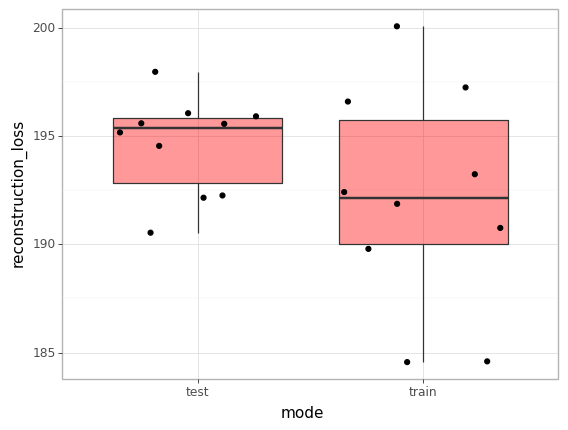

<ggplot: (8748506440629)>

In [8]:
p = ggplot(df, aes(x='mode', y='reconstruction_loss')) + geom_boxplot(fill='red', alpha=0.4) + geom_jitter() + theme_light()
p.save('reconstruction_loss_boxplot.svg')
p.save('reconstruction_loss_boxplot.png')
p

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: total_loss_boxplot.svg
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: total_loss_boxplot.png


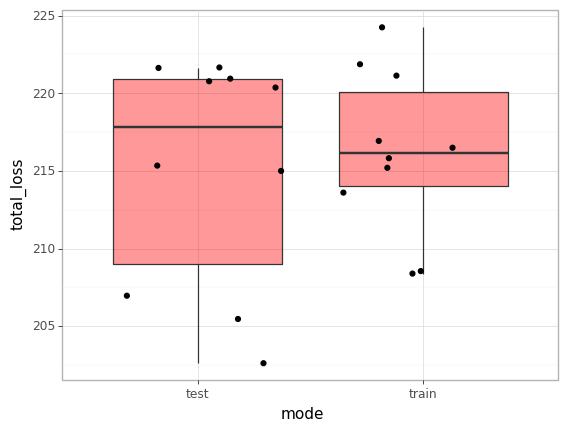

<ggplot: (8748506188487)>

In [9]:
p = ggplot(df, aes(x='mode', y='total_loss')) + geom_boxplot(fill='red', alpha=0.4) + geom_jitter() + theme_light()
p.save('total_loss_boxplot.svg')
p.save('total_loss_boxplot.png')
p

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: reconstruction_loss_curve.svg


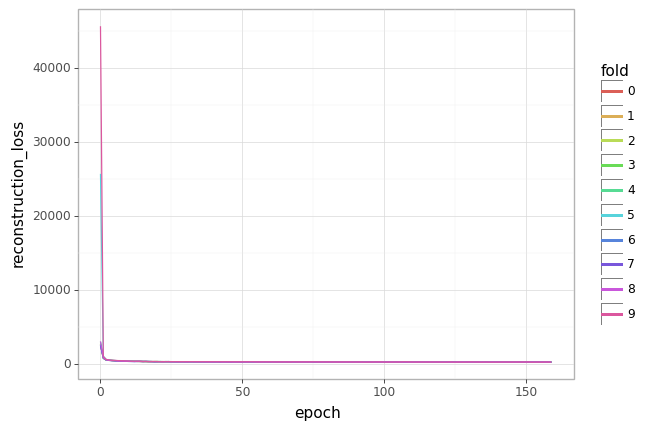

<ggplot: (8748506168263)>

In [10]:
p = ggplot(train_log, aes(x='epoch', y='reconstruction_loss', color='fold')) + geom_line() + theme_light()
p.save('reconstruction_loss_curve.svg')
p

/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: total_loss_curve.svg


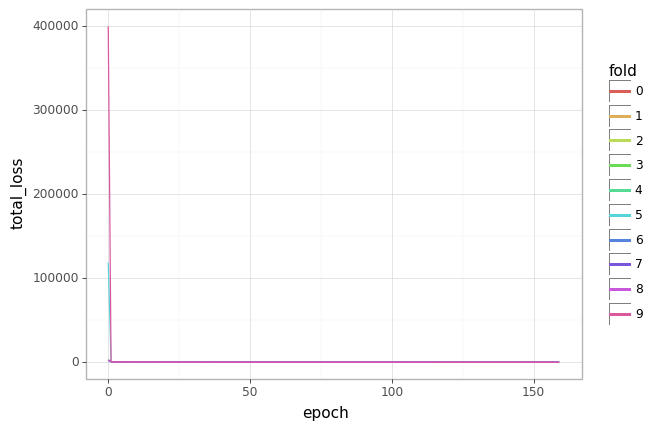

<ggplot: (8748506466208)>

In [11]:
p = ggplot(train_log, aes(x='epoch', y='total_loss', color='fold')) + geom_line() + theme_light()
p.save('total_loss_curve.svg')
p